In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,...,39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655,190450880,191730737.0,...,32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698,190397016,191533509.0,...,88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579,180870806,183202539.0,...,104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092,190378555,191470256.0,...,15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [5]:
df['Incident Datetime']

0         2019/05/01 01:00:00 AM
1         2019/06/22 07:45:00 AM
2         2019/06/03 04:16:00 PM
3         2018/11/16 04:34:00 PM
4         2019/05/27 02:25:00 AM
                   ...          
365628    2019/03/25 08:45:00 PM
365629    2019/05/01 04:45:00 PM
365630    2019/08/05 03:11:00 PM
365631    2019/04/23 10:22:00 PM
365632    2018/12/29 12:30:00 AM
Name: Incident Datetime, Length: 365633, dtype: object

In [6]:
from datetime import datetime

In [7]:
df['dt'] = df['Incident Datetime'].apply(lambda s: datetime.strptime(s, "%Y/%m/%d %H:%M:%S %p"))

In [20]:
df['year'] = df['dt'].apply(lambda dt: dt.year)
df['week'] = df['dt'].apply(lambda dt: dt.week)

In [36]:
incidents2020 = df[df['year'] == 2020]

<AxesSubplot:ylabel='Frequency'>

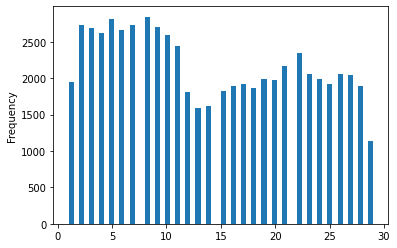

In [41]:
incidents2020['week'].plot.hist(bins=60)

In [42]:
l = list(map(tuple, df[['Latitude', 'Longitude']].to_numpy()))

In [43]:
len(l), len(set(l))

(365633, 25499)

In [44]:
def groupby(data):  # [(hash, content), ...] -> [(hash, [content1, content2, ...]), ...]
    d = dict()
    for h, content in data:
        if h not in d.keys():
            d[h] = []
        d[h].append(content)
    return list(d.items())

In [ ]:
geoclustered = groupby(zip(l, df.to_numpy()))

In [ ]:
def mmap(func, seq):
    def newfunc(seq):
        return func(*seq)
    return map(newfunc, seq)

In [ ]:
from pipe import Pipe, Apply, Map
from functools import partial

In [ ]:
top_clusters = Pipe >> enumerate >> partial(mmap, lambda i, c: (len(c[1]), i)) >> sorted >> reversed >> list

In [ ]:
top100_cases = top_clusters(geoclustered)[:100]

In [ ]:
Map(top100_cases) | Pipe >> (lambda i: i[1]) >> geoclustered.__getitem__ >> (lambda i: i[0]) >> (lambda c: ", ".join(map(str, c)))